In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from copy import copy
import plotly.express as px
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import datetime as dt
import scipy as sp
from scipy.stats import norm

In [2]:
d = dict()

In [3]:
d['aksa'] = pd.read_csv("AKSA.IS.csv")
d["garanti"] = pd.read_csv("GARAN.IS.csv")
d["kchol"] = pd.read_csv("KCHOL.IS (1).csv")
d["sise"] = pd.read_csv("SISE.IS.csv")
d["tcell"] = pd.read_csv("TCELL.IS.csv")
d["thyao"] = pd.read_csv("THYAO.IS.csv")
d["tskb"] = pd.read_csv("TSKB.IS.csv")
d["skbnk"] = pd.read_csv("SKBNK.IS.csv")
d["ttkom"] = pd.read_csv("TTKOM.IS.csv")
d["PGSUS"] = pd.read_csv("PGSUS.IS.csv")
d["BIST-100"] = pd.read_csv("XU100.IS.csv")
d["Date"] = d["thyao"]["Date"]

In [4]:
for key, value in d.items():
    if key != 'Date':
        d[key] = pd.Series(value['Adj Close'])
df = pd.concat(d, axis=1)
df = df[["Date", "aksa","garanti","kchol","sise","skbnk","tcell","thyao","tskb","ttkom","PGSUS","BIST-100"]] 

In [5]:
#Fill the missing entries with the mean of each stock
df["aksa"].fillna(df["aksa"].mean(), inplace=True)
df["garanti"].fillna(df["garanti"].mean(), inplace=True)
df["kchol"].fillna(df["kchol"].mean(), inplace=True)
df["sise"].fillna(df["sise"].mean(), inplace=True)
df["tcell"].fillna(df["tcell"].mean(), inplace=True)
df["thyao"].fillna(df["thyao"].mean(), inplace=True)
df["tskb"].fillna(df["tskb"].mean(), inplace=True)
df["skbnk"].fillna(df["skbnk"].mean(), inplace=True)
df["ttkom"].fillna(df["ttkom"].mean(), inplace=True)
df["PGSUS"].fillna(df["PGSUS"].mean(), inplace=True)
df

,Date,aksa,garanti,kchol,sise,skbnk,tcell,thyao,tskb,ttkom,PGSUS,BIST-100
0,10/1/2015,3.540773,6.548736,11.529980,2.085038,1.550000,7.507741,8.610000,0.879185,5.221804,18.700001,74205.500000
1,11/1/2015,3.500613,6.369809,10.473065,2.254668,1.550000,7.184134,7.660000,0.862058,4.981053,17.830000,79409.000000
2,12/1/2015,3.437027,6.647145,9.547174,2.113310,1.680000,6.407470,7.390000,0.867767,4.532758,17.559999,75232.796880
3,1/1/2016,3.226187,6.584521,10.324573,2.388959,1.530000,6.808746,7.310000,0.839222,4.482948,16.629999,71727.000000
4,2/1/2016,3.493920,7.371801,11.302875,2.586861,1.510000,7.171188,7.320000,0.919148,4.790112,17.379999,73481.101560
5,3/1/2016,3.263000,7.711762,12.499547,2.763559,1.600000,7.669548,7.790000,0.941984,5.545572,17.190001,75814.398440
6,4/1/2016,3.073213,6.873258,12.779061,2.487910,1.590000,7.831352,6.900000,1.017462,5.611987,16.309999,83268.000000
7,5/1/2016,2.796805,6.891441,11.691813,2.603483,1.370000,6.964078,6.220000,0.901181,5.005959,15.040000,85327.796880
8,6/1/2016,2.833175,6.664150,11.700732,2.658679,1.310000,6.841109,5.720000,0.905832,5.226742,13.570000,77803.398440
9,7/1/2016,3.087760,6.936899,11.415348,2.706155,1.220000,6.824036,5.170000,0.892210,5.218102,11.640000,76817.203130


/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


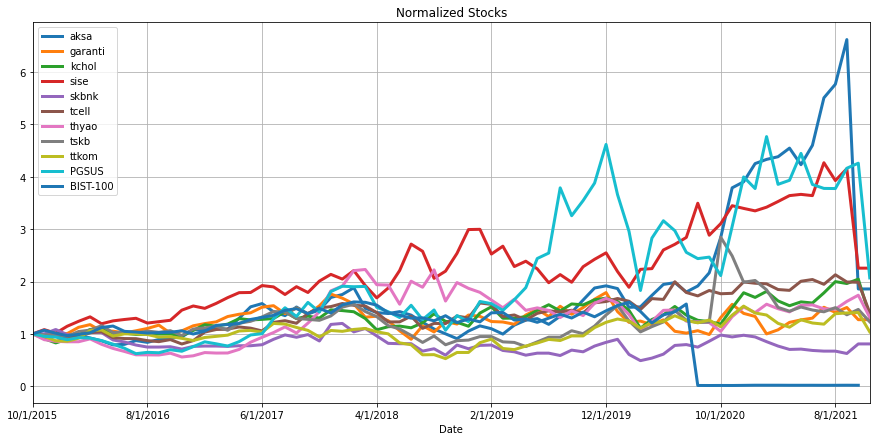

In [6]:
#create a non-normalized stock plot
def show_plot(df, fig_title):
    df.plot(x="Date",figsize= (15,7), linewidth= 3, title=fig_title)
    plt.grid()
    plt.show()
#show_plot(df, "Raw Stock Prices Without Normalization")
#Normalized (scaled) stock prices
def normalize_stocks(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x
#normalize_stocks(df)
show_plot(normalize_stocks(df), "Normalized Stocks")

The graph illustrated above shows that if 1 TL was invested in September 2015, what would happen the invested amount over the last six years.

In [7]:
#calclate the monthly percentage returns for each stock
df = df.drop("Date", axis=1)
expected_returns = df.pct_change()
expected_returns_with_bist100 = expected_returns.copy()
expected_returns = expected_returns.drop("BIST-100",axis=1)
expected_returns = expected_returns.iloc[1: , :]
expected_returns.head()

,aksa,garanti,kchol,sise,skbnk,tcell,thyao,tskb,ttkom,PGSUS
1,-0.011342,-0.027322,-0.091667,0.081356,0.000000,-0.043103,-0.110337,-0.019481,-0.046105,-0.046524
2,-0.018164,0.043539,-0.088407,-0.062696,0.083871,-0.108108,-0.035248,0.006623,-0.090000,-0.015143
3,-0.061344,-0.009421,0.081427,0.130435,-0.089286,0.062626,-0.010825,-0.032895,-0.010989,-0.052961
4,0.082987,0.119565,0.094755,0.082840,-0.013072,0.053232,0.001368,0.095238,0.068518,0.045099
5,-0.066092,0.046116,0.105873,0.068306,0.059603,0.069495,0.064208,0.024845,0.157712,-0.010932


In [8]:
#dataframe with BIST-100
expected_returns_with_bist100 = expected_returns_with_bist100.iloc[1:,:]
expected_returns_with_bist100.head()

,aksa,garanti,kchol,sise,skbnk,tcell,thyao,tskb,ttkom,PGSUS,BIST-100
1,-0.011342,-0.027322,-0.091667,0.081356,0.000000,-0.043103,-0.110337,-0.019481,-0.046105,-0.046524,0.070123
2,-0.018164,0.043539,-0.088407,-0.062696,0.083871,-0.108108,-0.035248,0.006623,-0.090000,-0.015143,-0.052591
3,-0.061344,-0.009421,0.081427,0.130435,-0.089286,0.062626,-0.010825,-0.032895,-0.010989,-0.052961,-0.046599
4,0.082987,0.119565,0.094755,0.082840,-0.013072,0.053232,0.001368,0.095238,0.068518,0.045099,0.024455
5,-0.066092,0.046116,0.105873,0.068306,0.059603,0.069495,0.064208,0.024845,0.157712,-0.010932,0.031754


QUESTION 2

In [9]:
#calculate the average monthly returns for each stock
expected_returns.mean()

aksa       0.021446
garanti    0.009314
kchol      0.009050
sise       0.018128
skbnk      0.003817
tcell      0.008589
thyao      0.011300
tskb       0.014080
ttkom      0.005631
PGSUS      0.026888
dtype: float64

In [10]:
#calculate the standard deviation for the monthly returns for each stock
expected_returns.std()

aksa       0.135809
garanti    0.110938
kchol      0.099679
sise       0.112751
skbnk      0.118293
tcell      0.088528
thyao      0.124158
tskb       0.182242
ttkom      0.101518
PGSUS      0.184620
dtype: float64

In [11]:
#calculate the skewness and kurtosis of stocks
from scipy.stats import kurtosis, skew
for i in expected_returns.columns[1:]:
    print("the skewness of stock", i, "is", skew(expected_returns[i], bias=False))
    print("the kurtosis of stock", i, "is", kurtosis(expected_returns[i], bias=False))

the skewness of stock garanti is 0.20113111057016644
the kurtosis of stock garanti is 0.2680931924265937
the skewness of stock kchol is -0.47084943678544844
the kurtosis of stock kchol is 1.7447340335663801
the skewness of stock sise is -1.0563132341436445
the kurtosis of stock sise is 3.2056011271182285
the skewness of stock skbnk is 0.6149953986408976
the kurtosis of stock skbnk is 1.5812942859493244
the skewness of stock tcell is -0.1895766164380873
the kurtosis of stock tcell is 1.3000237652074969
the skewness of stock thyao is 0.1342655437675261
the kurtosis of stock thyao is -0.36449144028206426
the skewness of stock tskb is 5.127602660198233
the kurtosis of stock tskb is 36.66727465843978
the skewness of stock ttkom is 0.05793279723111391
the kurtosis of stock ttkom is 0.6929675131972286
the skewness of stock PGSUS is 0.2619548860273151
the kurtosis of stock PGSUS is 1.0907387323194886


Basically, skewness and kurtosis are used to test normality in the distribution. There are not such official rules about cut-off criteria to decide on non-normality based on the largeness of skew and kurtosis. Skewness indicates the amount and how symetric the distirbution is (departure from horizontal symetry), whereas kurtosis shows us the heaviness of the distribution tails. In other words, kurtosis explains how tall and sharp the central peak is. As we understand the shape of the data, we can undestand where and how the information is distributed, which enables us to analyze outliers more easily. If the skewness is between +2 and -2 (0 means that possible non-normality), this indicates that the distribution is substantially skewed and the data is considered to be normal. Negative skew tells us that the mass of the distribution is concentrated on the right side, whereas in positive skew, the mass of the distribution is concentrated on the left-hand side. Therefore, when we observe our stocks, we would hope to see positive skewness. In addition, when the kurtosis is between +3 and -3, it indicates that the data is considered to be normal. Based on the information mentioned above, the kurtosis of Şişe is not in the range. Especially, when we look at the skewness and kurtosis of TSKB, it can be deduced that there is a highly possible non-normality for that stock. This findings can be also supported by using other methodologies.

Another way to test normality is to perform a statictical test. The Shapiro-Wilk test provides us the null hypothesis that the data is normally distributed. Let's take the p-value for 5% and conduct a normality test.

In [12]:
from scipy import stats
p_value = stats.shapiro(expected_returns)[1]
if p_value <= 0.05:
    print("Null-hypothesis of normality is rejected.")
else:
    print("Null-hypothesis of normality is accepted.")

Null-hypothesis of normality is rejected.


As p-value is less than 5%, the null-hypothesis is rejected. The data is non-normal. The histograms displayed below shows us the distribution of expected returns for each stock. By examining these histograms, we can have a more clear view about the distribution of expected returns for each stock.

/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/Elma/Desktop/anaconda3/lib/python3.7/site-pack

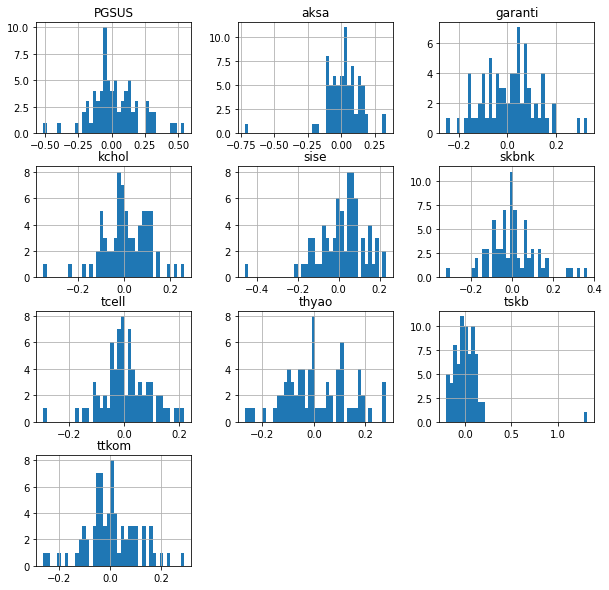

In [13]:
#The histograms displayed below shows us the distribution of expected returns for each stock
expected_returns.hist(figsize=(10,10), bins= 40);

Value at Risk is a measure of risk assesment or risk management. For a given confidence interval, which is 95% in our case, VaR measures the likelihood of exceeding a certain threshold for loss. For the second question, as there is no weighted distribution, by calculating VaR we can assume that we can calculate the average and standard deviation, considering all the expected returns of all the stocks in our portfolio. The formula for the VaR is; [Expected Return of the Portfolio - (z_score * standard deviation of the portfolio)] * portfolio value. Let's calculate the average expected return and standard deviation of stocks to calculate VaR for each stock.

In [14]:
exp_return_mean = expected_returns.mean()
exp_return_std = expected_returns.std()

In [15]:
#VaR for each stock
for j in expected_returns.columns:
    liste = list(expected_returns[j].sort_values(ascending=True)[:4])
    print("VaR for the stock", j, "is", liste[3])

VaR for the stock aksa is -0.10447760158598063
VaR for the stock garanti is -0.1612020651193834
VaR for the stock kchol is -0.14354055033108704
VaR for the stock sise is -0.15758467510847807
VaR for the stock skbnk is -0.1711711711711712
VaR for the stock tcell is -0.12670988912377945
VaR for the stock thyao is -0.18930283589560304
VaR for the stock tskb is -0.17441882513557594
VaR for the stock ttkom is -0.1719009662233184
VaR for the stock PGSUS is -0.20975883342680868


When we examine the VaR results for each stock, it can be deduced that the most risky stock for our portfolio is PGSUS with the VaR value of 20.97%. This means that if we invest in PGSUS, the maximum percentage we can expect to loss is 20.97%. This stock is followed by THYAO with 18.93%. As both of the companies operate in the same industry, they might encounter with similar obstacles such as COVID-19. Other VaR values for other stocks can be also seen above.

In [16]:
#expected shortfall for each stock
for i in expected_returns.columns:
    print("Expected Shortfall at 5% for stock", i, "is", expected_returns[i].sort_values(ascending=True)[:4].mean())

Expected Shortfall at 5% for stock aksa is -0.30613364199013127
Expected Shortfall at 5% for stock garanti is -0.1965948346101748
Expected Shortfall at 5% for stock kchol is -0.22367048972173953
Expected Shortfall at 5% for stock sise is -0.24740759017181108
Expected Shortfall at 5% for stock skbnk is -0.21573227878714812
Expected Shortfall at 5% for stock tcell is -0.18589244375572198
Expected Shortfall at 5% for stock thyao is -0.2337009115962753
Expected Shortfall at 5% for stock tskb is -0.1866091256564646
Expected Shortfall at 5% for stock ttkom is -0.2187525217882264
Expected Shortfall at 5% for stock PGSUS is -0.3429568110898543


Expected shortfall is a risk measure, which is highly sensitive to the shape of the tail of the distribution. As you can also see from the histogram displayed above, PGSUS is the riskiest stock with 34.29%. The main aim of the expected shortfall is to measure the expected loss, which is greater than the VaR, which is calculated with the same confidence level(in this case, this is 5%).

QUESTION 3

In [17]:
#Divide the sample period into two sub-periods
#first sub-period; October 2015 - September 2018
#second sub-period; October 2018 - September 2021
first_sub_period_returns = expected_returns[:35]
second_sub_period_returns = expected_returns[35:]

In [18]:
Apple#Calculate the mean for the first sub-period
first_sub_period_returns_mean = first_sub_period_returns.mean()
first_sub_period_returns_mean

aksa       0.006429
garanti    0.005511
kchol      0.011942
sise       0.025091
skbnk     -0.004994
tcell      0.008411
thyao      0.029743
tskb       0.001771
ttkom     -0.010922
PGSUS      0.017801
dtype: float64

In [19]:
Apple#Calculate the mean for the second sub-period
second_sub_period_returns_mean = second_sub_period_returns.mean()
second_sub_period_returns_mean

aksa       0.035278
garanti    0.012818
kchol      0.006386
sise       0.011716
skbnk      0.011933
tcell      0.008753
thyao     -0.005687
tskb       0.025417
ttkom      0.020877
PGSUS      0.035259
dtype: float64

In [20]:
#Calculate the standard deviation for the first sub-period
first_sub_period_returns_std = first_sub_period_returns.std()
first_sub_period_returns_std

aksa       0.089460
garanti    0.096505
kchol      0.073398
sise       0.093151
skbnk      0.098770
tcell      0.081032
thyao      0.119539
tskb       0.077750
ttkom      0.081940
PGSUS      0.122165
dtype: float64

In [21]:
Apple#Calculate the standard deviation for the second sub-period
second_sub_period_returns_std = second_sub_period_returns.std()
second_sub_period_returns_std

aksa       0.167711
garanti    0.123955
kchol      0.119871
sise       0.129139
skbnk      0.134627
tcell      0.096004
thyao      0.127469
tskb       0.242485
ttkom      0.115702
PGSUS      0.229047
dtype: float64

When we examine the returns of these stocks under two different time periods, it can be deduced that only Şişe Cam, THYAO has an higher expected return in the first sub-period, whereas all other stocks have a higher expected return during the second sub-period. When we compare the standard deiviations, it can be deduced that standard deviations for all the stocks are higher during the second sub-period. This actually supports the argument that higher the risk, higher returns we expect. As when we look at the average returns, the stocks have higher average return during the second sub-period in general, and also they have higher standard deviations, which a measure of risk. 

In [22]:
#VaR for the first sub-group
for j in first_sub_period_returns.columns:
    liste = list(first_sub_period_returns[j].sort_values(ascending=True)[:4])
    print("VaR for the stock", j, "is", liste[3])

VaR for the stock aksa is -0.09978476806088954
VaR for the stock garanti is -0.13317473281938563
VaR for the stock kchol is -0.09045508454900109
VaR for the stock sise is -0.09974420665525874
VaR for the stock skbnk is -0.13440860215053763
VaR for the stock tcell is -0.10810822849351076
VaR for the stock thyao is -0.11424903722721436
VaR for the stock tskb is -0.11224492979556933
VaR for the stock ttkom is -0.10798813325832723
VaR for the stock PGSUS is -0.11422848649871464


In [23]:
Apple#expected shortfall for the first sub-period
for i in second_sub_period_returns.columns:
    print("Expected Shortfall at 5% for stock", i, "is",first_sub_period_returns[i].sort_values(ascending=True)[:4].mean())

Expected Shortfall at 5% for stock aksa is -0.12844232734965488
Expected Shortfall at 5% for stock garanti is -0.15051308194152646
Expected Shortfall at 5% for stock kchol is -0.11074439434437369
Expected Shortfall at 5% for stock sise is -0.13797569805922458
Expected Shortfall at 5% for stock skbnk is -0.14875689083483384
Expected Shortfall at 5% for stock tcell is -0.1298349949478774
Expected Shortfall at 5% for stock thyao is -0.13739225580096975
Expected Shortfall at 5% for stock tskb is -0.12348956768285049
Expected Shortfall at 5% for stock ttkom is -0.1599723744673768
Expected Shortfall at 5% for stock PGSUS is -0.1608132406436301


In [24]:
Apple#VaR for the second sub-group
for j in second_sub_period_returns.columns:
    liste = list(second_sub_period_returns[j].sort_values(ascending=True)[:4])
    print("VaR for the stock", j, "is", liste[3])

VaR for the stock aksa is -0.09223312471619516
VaR for the stock garanti is -0.15464929921037796
VaR for the stock kchol is -0.10859967260768277
VaR for the stock sise is -0.1452145966113767
VaR for the stock skbnk is -0.13114754098360648
VaR for the stock tcell is -0.09705894393971093
VaR for the stock thyao is -0.1475279106858054
VaR for the stock tskb is -0.17441882513557594
VaR for the stock ttkom is -0.11718750879800899
VaR for the stock PGSUS is -0.207295905206622


In [25]:
#expected shortfall for the second sub-period
for i in second_sub_period_returns.columns:
    print("Expected Shortfall at 5% for stock", i, "is",second_sub_period_returns[i].sort_values(ascending=True)[:4].mean())

Expected Shortfall at 5% for stock aksa is -0.2741942361124119
Expected Shortfall at 5% for stock garanti is -0.19495664313292344
Expected Shortfall at 5% for stock kchol is -0.20902663714015488
Expected Shortfall at 5% for stock sise is -0.233625590387424
Expected Shortfall at 5% for stock skbnk is -0.2048683703822561
Expected Shortfall at 5% for stock tcell is -0.1606994359191277
Expected Shortfall at 5% for stock thyao is -0.22325718029382588
Expected Shortfall at 5% for stock tskb is -0.1866091256564646
Expected Shortfall at 5% for stock ttkom is -0.17603820763367517
Expected Shortfall at 5% for stock PGSUS is -0.3423410790348076


When we compare the vaue of VaR for the first and second sub-periods, it can be deduced that the maximum percentage we can expect to loss is higher for the second sub-period. This is highly expected when the mean and standard deviation of stocks are taken into account based on these two sub-periods. The value of VaR for the first and second sub-periods are 14.45% and 21.48%, respectively.

The expected loss for the expected shortfall, which is greater than VaR, is also greater in the second sub-period. The expected shortfall is 27.49% in the second sub-period, whereas in the first sub-period, this rate is 18.35%.

Consequently, equality of the mean returns and risk measures in sub-periods cannot be assumed, according to the calculation mentioned above.

QUESTION 4

In [26]:
Apple#calculate covariance matrix
#diagonal cells represents the variance of stocks and other cells are the covariance
cov_matrix = expected_returns.cov()
cov_matrix

,aksa,garanti,kchol,sise,skbnk,tcell,thyao,tskb,ttkom,PGSUS
aksa,0.018444,0.006972,0.002347,0.008372,-0.000901,0.000526,0.002006,0.006206,0.001781,0.005326
garanti,0.006972,0.012307,-0.000266,0.005012,-0.001878,-0.002393,-0.001625,0.004585,-0.001438,-0.000454
kchol,0.002347,-0.000266,0.009936,-0.001135,0.004522,0.005619,0.007169,0.003362,0.006689,0.011893
sise,0.008372,0.005012,-0.001135,0.012713,-0.002871,-0.001049,-0.000199,-0.001311,-0.001088,0.000032
skbnk,-0.000901,-0.001878,0.004522,-0.002871,0.013993,0.005031,0.006885,0.009785,0.006050,0.008260
tcell,0.000526,-0.002393,0.005619,-0.001049,0.005031,0.007837,0.005847,0.004060,0.006251,0.009249
thyao,0.002006,-0.001625,0.007169,-0.000199,0.006885,0.005847,0.015415,0.002048,0.006282,0.015396
tskb,0.006206,0.004585,0.003362,-0.001311,0.009785,0.004060,0.002048,0.033212,0.003171,0.003194
ttkom,0.001781,-0.001438,0.006689,-0.001088,0.006050,0.006251,0.006282,0.003171,0.010306,0.011355
PGSUS,0.005326,-0.000454,0.011893,0.000032,0.008260,0.009249,0.015396,0.003194,0.011355,0.034085


In [27]:
#Form a portfolio by equally investing in 10 stocks
#create weights and find the average percentage return for each stock
weights = np.array([0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
average_returns = expected_returns.mean()
#portfolio mean and standard deviation
portfolio_mean = average_returns.dot(weights)
portfolio_std = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
print("expected monthly return of the portfolio", portfolio_mean)
print("standard deviation of portfolio is", portfolio_std)

expected monthly return of the portfolio 0.012824410877043634
standard deviation of portfolio is 0.07110535953307395


In [28]:
#I have 95% confidence that my portfolio will not loose more than 10.41% in one month
confidence_level = 0.05
VaR_portfolio = norm.ppf(confidence_level, portfolio_mean, portfolio_std)
VaR_portfolio

-0.10413349764662155

In [29]:
#In one month, my portfolio will not loose more than; 81.3% of its value
count = expected_returns.count()[0]
num_months = count
VaR_portfolio * np.sqrt(num_months)

-0.8897169939057488

In [30]:
#Evaluate the risk and normality of returns
#monthly return of our portfolio will be between these boundaries
lower = portfolio_mean - 2 * portfolio_std / np.sqrt(count)
upper = portfolio_mean + 2 * portfolio_std / np.sqrt(count)
print("Lower and Upper Bounds are", lower,"and",upper,"respectively")

Lower and Upper Bounds are -0.0038200948260449577 and 0.029468916580132225 respectively


As we equally invest in these 10 stocks regardless of their expected return and standard deviation, we can basically eliminate some of the risk of potential losses. The total risk taken by the investor gets lower as we equally invest all the stocks. After we invest equally, the expected monthly return is 1.55% with a standard deviation of 6.7%. In addition, The value at risk of the portfolio is 9.58%, which is the maximum amount that we can loose by investing in that portfolio by assigning equal weights. Moreover, the expected shortfall is lower with 12.41%, compared to the percentages gathered from the above tasks such as first sub and second sub-period risk measures. Some of the individual stocks have a little higher or almost the same expected return with a higher standard deviation. Therefore, as we equally invest in these stocks, we become more stable as we arrange risk and profit trade-off. 

In [31]:
Apple#####Answer of the question 5 is on the excel file

QUESTION 6

<AxesSubplot:>

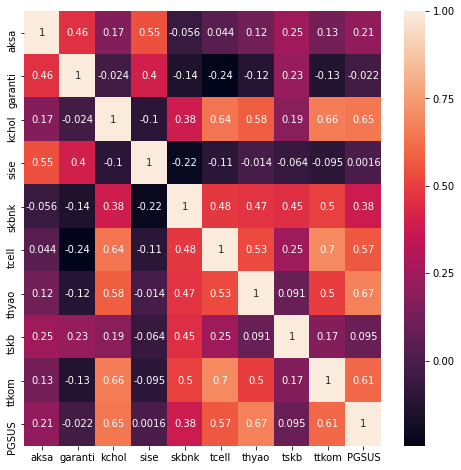

In [32]:
#Use actual correlation coefficient between returns of two stocks
cm = expected_returns.corr()
plt.figure(figsize=(8,8))
sn.heatmap(cm, annot=True)

TERM PROJECT - PART IV

QUESTION 1

In [33]:
#calculate beta and alpha for each individual stocks
stock_betas = list()
for i in expected_returns.columns:
    beta, alpha = np.polyfit(x= expected_returns_with_bist100["BIST-100"],y= expected_returns_with_bist100[i], deg=1)
    print("Beta and alpha for", i, "are", beta , alpha , "respectively")
    stock_betas.append(beta)

Beta and alpha for aksa are -0.019985580561543016 0.021401852305927598 respectively
Beta and alpha for garanti are -0.014755571381545405 0.009281950816004384 respectively
Beta and alpha for kchol are 0.03686400402134652 0.00913120249058558 respectively
Beta and alpha for sise are -0.15971835987653837 0.017776512751197848 respectively
Beta and alpha for skbnk are -0.004632947644850541 0.0038067769547104526 respectively
Beta and alpha for tcell are 0.010869803766171512 0.008613310494106735 respectively
Beta and alpha for thyao are -0.06373024433271565 0.01115985145441656 respectively
Beta and alpha for tskb are 0.0780631807974723 0.014251929040263484 respectively
Beta and alpha for ttkom are 0.010608015699770367 0.005653859051933785 respectively
Beta and alpha for PGSUS are -0.029917217451615893 0.02682261292770073 respectively


In [34]:
#Beta calculation and Regression Analysis for the optimal portfolio
#optimal_weights = np.array([0.0406170312044951, 0.284853979905693, 0.0408464863535409, 0.256773453939189, -0.16391270169274, 0.303402665065043, 0.00463094612522694, -0.063188108598428, 0.0360947908501864, 0.259881456847794])
average_returns_optimal = expected_returns.mean()
#Optimal portfolio mean and standard deviation
optimal_portfolio_mean = average_returns_optimal.dot(average_returns_optimal)
optimal_portfolio_std = np.sqrt(average_returns_optimal.T.dot(cov_matrix).dot(average_returns_optimal))
print("Expected monthly return of the optimal portfolio", optimal_portfolio_mean)
print("Standard deviation of optimal portfolio is", optimal_portfolio_std)

stock_betas_matrix = np.array(stock_betas)
res = np.multiply(average_returns_optimal, stock_betas_matrix)
optimal_portfolio_beta = np.sum(res)
print("Estimated beta for our optimal portfolio is",optimal_portfolio_beta)

Expected monthly return of the optimal portfolio 0.002126200616744958
Standard deviation of optimal portfolio is 0.010394157870833042
Estimated beta for our optimal portfolio is -0.0034178870306313123


In [35]:
returns_with_bist100 = pd.read_excel('lastamigoo.xlsx', index_col=0)
returns_with_bist100.head()

,ttkom,thyao,tcell,skbnk,sise,pgsus,kchol,garanti,aksa,bist100
tskb,,,,,,,,,,
-0.0904,-0.046105,-0.0099,-0.0743,0.0149,0.0105,-0.0434,0.0393,-0.027322,-0.0061,0.070123
0.0919,-0.046105,0.0803,0.0988,0.1150,0.1637,0.0595,0.1183,-0.027322,0.0982,-0.052591
-0.0193,-0.090000,-0.1103,-0.0427,0.0000,-0.1165,-0.0465,-0.0919,0.043539,-0.0112,-0.046599
0.0070,-0.010989,-0.0352,-0.1080,0.0837,0.0811,-0.0151,-0.0879,-0.009421,-0.0113,0.024455
-0.0334,0.068518,-0.0108,0.0618,-0.0894,-0.0626,-0.0530,0.0817,0.119565,-0.0171,0.031754


In [36]:
#calculate the skewness and kurtosis of stocks
from scipy.stats import kurtosis, skew
for i in returns_with_bist100.columns:
    print("the skewness of stock", i, "is", skew(returns_with_bist100[i], bias=False))
    print("the kurtosis of stock", i, "is", kurtosis(returns_with_bist100[i], bias=False))

the skewness of stock ttkom is 0.27521074509970367
the kurtosis of stock ttkom is 0.5935277106132211
the skewness of stock thyao is 0.20917494013174703
the kurtosis of stock thyao is -0.37451978798306396
the skewness of stock tcell is -0.08078918024452068
the kurtosis of stock tcell is 0.11864576582873232
the skewness of stock skbnk is 0.8082234088996841
the kurtosis of stock skbnk is 1.4361592379270647
the skewness of stock sise is -0.061149716472505423
the kurtosis of stock sise is -0.4818670821472484
the skewness of stock pgsus is 0.6558668140148498
the kurtosis of stock pgsus is 0.7258330083082463
the skewness of stock kchol is 0.13147757497250245
the kurtosis of stock kchol is 0.08452235586151335
the skewness of stock garanti is 0.2123259934055465
the kurtosis of stock garanti is 0.3811698995609807
the skewness of stock aksa is 0.5276115961447074
the kurtosis of stock aksa is 1.2877340963796566
the skewness of stock bist100 is -0.022587082112117386
the kurtosis of stock bist100 is

In [37]:
import statsmodels.api as sm
#aksa stock
X_Bist100 = returns_with_bist100["bist100"]
X_bist = sm.add_constant(X_Bist100)
Y_aksa = returns_with_bist100["aksa"]
model_aksa = sm.OLS(Y_aksa, X_bist).fit()
model_aksa.summary2()

/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     -0.013   
Dependent Variable: aksa             AIC:                -124.9435
Date:               2021-12-24 16:01 BIC:                -120.3626
No. Observations:   73               Log-Likelihood:     64.472   
Df Model:           1                F-statistic:        0.06939  
Df Residuals:       71               Prob (F-statistic): 0.793    
R-squared:          0.001            Scale:              0.010291 
--------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const         0.0311     0.0121   2.5757   0.0121    0.0070   0.0552
bist100       0.0476     0.1809   0.2634   0.7930   -0.3130   0.4083
------------------------------------------------------------------
Omnibus:               6.594        Durbin-Watson:           1.477
Prob(Omnibus):         0.037        Jarque-Bera (JB):        6.497
Skew:                  0.488        Prob(JB):                0.039
Kurtosis:              4.088        Condition No.:           15   
==================================================================

"""

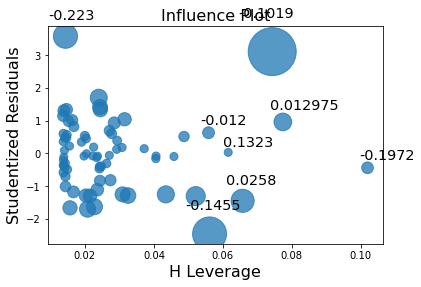

In [38]:
from scipy.stats import zscore
sm.graphics.influence_plot(model_aksa)
plt.show()

In [39]:
X_bist = X_bist.drop([-0.223,-0.1455, -0.1972, -0.1019])
Y_aksa = Y_aksa.drop([-0.223,-0.1455, -0.1972, -0.1019])
model_aksa2 = sm.OLS(Y_aksa, X_bist).fit()
model_aksa2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     -0.015   
Dependent Variable: aksa             AIC:                -143.2711
Date:               2021-12-24 16:01 BIC:                -138.8029
No. Observations:   69               Log-Likelihood:     73.636   
Df Model:           1                F-statistic:        0.004914 
Df Residuals:       67               Prob (F-statistic): 0.944    
R-squared:          0.000            Scale:              0.0071344
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        0.0268     0.0103    2.5937   0.0117    0.0062   0.0475
bist100     -0.0117     0.1675   -0.0701   0.9443   -0.3462   0.3227
------------------------------------------------------------------
Omnibus:              2.298         Durbin-Watson:           1.600
Prob(Omnibus):        0.317         Jarque-Bera (JB):        1.551
Skew:                 -0.122        Prob(JB):                0.460
Kurtosis:             2.307         Condition No.:           16   
==================================================================

"""

beta and alpha for apple are 0.04764454856503529 0.031119596887993154 respectively


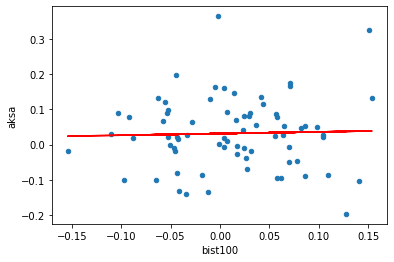

In [40]:
#straight line equation y = beta * rm + alpha
beta, alpha = np.polyfit(x= returns_with_bist100["bist100"],y= returns_with_bist100["aksa"], deg=1)
print("beta and alpha for apple are", beta , alpha , "respectively")
#alpha is the excess return
returns_with_bist100.plot.scatter(x="bist100", y= "aksa")
plt.plot(returns_with_bist100["bist100"], beta * returns_with_bist100["bist100"] + alpha, "-", color="r")

In [41]:
#ttkom
X_Bist100 = returns_with_bist100["bist100"]
X_bist = sm.add_constant(X_Bist100)
Y_ttkom = returns_with_bist100["ttkom"]
model_ttkom = sm.OLS(Y_ttkom, X_bist).fit()
model_ttkom.summary2()

/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.514    
Dependent Variable: ttkom            AIC:                -184.7661
Date:               2021-12-24 16:01 BIC:                -180.1851
No. Observations:   73               Log-Likelihood:     94.383   
Df Model:           1                F-statistic:        77.23    
Df Residuals:       71               Prob (F-statistic): 5.79e-13 
R-squared:          0.521            Scale:              0.0045350
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const       -0.0044     0.0080   -0.5538   0.5815   -0.0204   0.0116
bist100      1.0551     0.1201    8.7880   0.0000    0.8157   1.2945
------------------------------------------------------------------
Omnibus:               1.040        Durbin-Watson:           1.589
Prob(Omnibus):         0.594        Jarque-Bera (JB):        0.471
Skew:                  0.075        Prob(JB):                0.790
Kurtosis:              3.364        Condition No.:           15   
==================================================================

"""

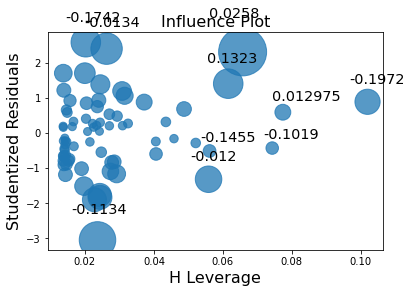

In [42]:
sm.graphics.influence_plot(model_ttkom)
plt.show()

In [43]:
X_bist = X_bist.drop([-0.1742,-0.1972, 0.0258, -0.1134])
Y_ttkom = Y_ttkom.drop([-0.1742,-0.1972, 0.0258, -0.1134])
model_ttkom2 = sm.OLS(Y_ttkom, X_bist).fit()
model_ttkom2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.504    
Dependent Variable: ttkom            AIC:                -193.8128
Date:               2021-12-24 16:01 BIC:                -189.3446
No. Observations:   69               Log-Likelihood:     98.906   
Df Model:           1                F-statistic:        70.09    
Df Residuals:       67               Prob (F-statistic): 5.14e-12 
R-squared:          0.511            Scale:              0.0034296
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const       -0.0057     0.0072   -0.7863   0.4345   -0.0200   0.0087
bist100      0.9519     0.1137    8.3718   0.0000    0.7250   1.1789
------------------------------------------------------------------
Omnibus:               0.378        Durbin-Watson:           1.832
Prob(Omnibus):         0.828        Jarque-Bera (JB):        0.441
Skew:                  0.167        Prob(JB):                0.802
Kurtosis:              2.795        Condition No.:           16   
==================================================================

"""

beta and alpha for apple are 1.0550958394507028 -0.00444157016250397 respectively


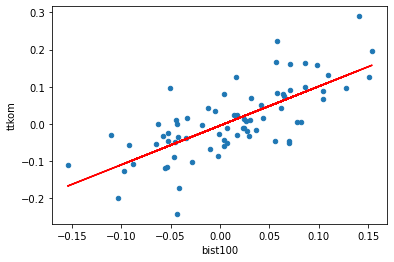

In [44]:
#straight line equation y = beta * rm + alpha
beta, alpha = np.polyfit(x= returns_with_bist100["bist100"],y= returns_with_bist100["ttkom"], deg=1)
print("beta and alpha for apple are", beta , alpha , "respectively")
#alpha is the excess return
returns_with_bist100.plot.scatter(x="bist100", y= "ttkom")
plt.plot(returns_with_bist100["bist100"], beta * returns_with_bist100["bist100"] + alpha, "-", color="r")

/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


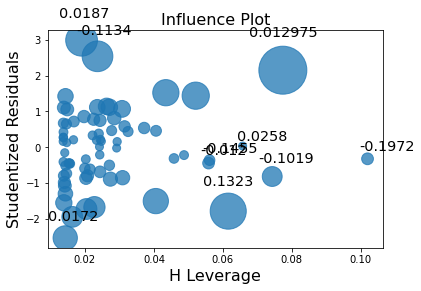

In [45]:
X_Bist100 = returns_with_bist100["bist100"]
X_bist = sm.add_constant(X_Bist100)
Y_garanti = returns_with_bist100["garanti"]
model_garanti = sm.OLS(Y_garanti, X_bist).fit()
model_garanti.summary2()
sm.graphics.influence_plot(model_garanti)
plt.show()

In [46]:
X_bist = X_bist.drop([0.012975,-0.1972, 0.1323])
Y_garanti = Y_garanti.drop([0.012975,-0.1972, 0.1323])
model_garanti2 = sm.OLS(Y_garanti, X_bist).fit()
model_garanti2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.062    
Dependent Variable: garanti          AIC:                -115.6160
Date:               2021-12-24 16:01 BIC:                -111.1190
No. Observations:   70               Log-Likelihood:     59.808   
Df Model:           1                F-statistic:        5.596    
Df Residuals:       68               Prob (F-statistic): 0.0209   
R-squared:          0.076            Scale:              0.010914 
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const       0.0175     0.0128    1.3640   0.1771   -0.0081    0.0432
bist100    -0.4928     0.2083   -2.3655   0.0209   -0.9086   -0.0771
------------------------------------------------------------------
Omnibus:               1.192        Durbin-Watson:           2.057
Prob(Omnibus):         0.551        Jarque-Bera (JB):        0.581
Skew:                  0.089        Prob(JB):                0.748
Kurtosis:              3.409        Condition No.:           17   
==================================================================

"""

beta and alpha for apple are -0.2561594425600924 0.01408637039634403 respectively


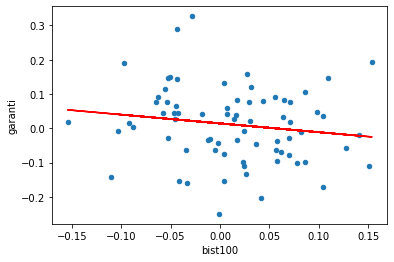

In [47]:
#straight line equation y = beta * rm + alpha
beta, alpha = np.polyfit(x= returns_with_bist100["bist100"],y= returns_with_bist100["garanti"], deg=1)
print("beta and alpha for apple are", beta , alpha , "respectively")
#alpha is the excess return
returns_with_bist100.plot.scatter(x="bist100", y= "garanti")
plt.plot(returns_with_bist100["bist100"], beta * returns_with_bist100["bist100"] + alpha, "-", color="r")

/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


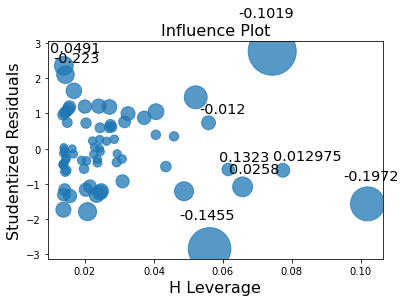

In [48]:
#kchol
X_Bist100 = returns_with_bist100["bist100"]
X_bist = sm.add_constant(X_Bist100)
Y_kchol = returns_with_bist100["kchol"]
model_kchol = sm.OLS(Y_kchol, X_bist).fit()
sm.graphics.influence_plot(model_kchol)
plt.show()

beta and alpha for apple are 0.01908581418618401 0.014965575087056263 respectively


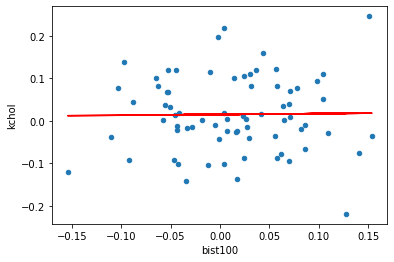

In [49]:
X_bist = X_bist.drop([-0.1972,-0.1455,-0.1019,0.0258])
Y_kchol = Y_kchol.drop([-0.1972,-0.1455,-0.1019,0.0258])
model_kchol2 = sm.OLS(Y_kchol, X_bist).fit()
beta, alpha = np.polyfit(x= returns_with_bist100["bist100"],y= returns_with_bist100["kchol"], deg=1)
print("beta and alpha for apple are", beta , alpha , "respectively")
#alpha is the excess return
returns_with_bist100.plot.scatter(x="bist100", y= "kchol")
plt.plot(returns_with_bist100["bist100"], beta * returns_with_bist100["bist100"] + alpha, "-", color="r")

/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


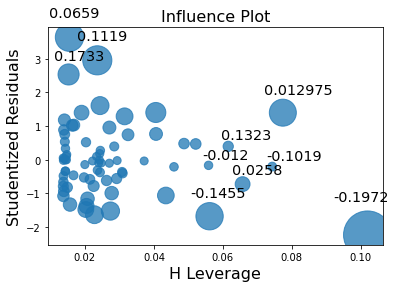

In [50]:
#skbnk
X_Bist100 = returns_with_bist100["bist100"]
X_bist = sm.add_constant(X_Bist100)
Y_skbnk = returns_with_bist100["skbnk"]
model_skbnk = sm.OLS(Y_skbnk, X_bist).fit()
sm.graphics.influence_plot(model_skbnk)
plt.show()

beta and alpha for apple are -0.132208107830136 0.0050511669463173745 respectively


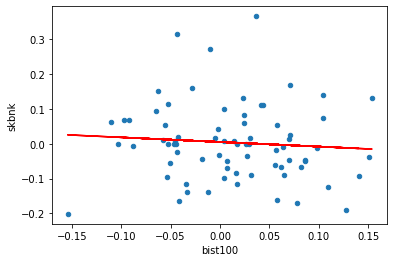

In [51]:
X_bist = X_bist.drop([-0.1972,0.0659,0.1119,0.012975,-0.1455])
Y_skbnk = Y_skbnk.drop([-0.1972,0.0659,0.1119,0.012975,-0.1455])
model_skbnk2 = sm.OLS(Y_skbnk, X_bist).fit()
beta, alpha = np.polyfit(x= returns_with_bist100["bist100"],y= returns_with_bist100["skbnk"], deg=1)
print("beta and alpha for apple are", beta , alpha , "respectively")
#alpha is the excess return
returns_with_bist100.plot.scatter(x="bist100", y= "skbnk")
plt.plot(returns_with_bist100["bist100"], beta * returns_with_bist100["bist100"] + alpha, "-", color="r")

/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


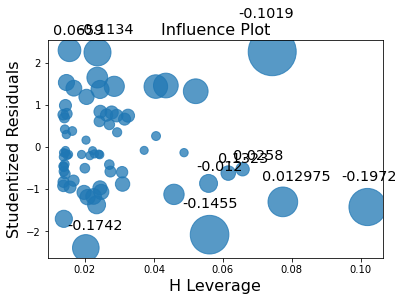

In [52]:
#thyao
X_Bist100 = returns_with_bist100["bist100"]
X_bist = sm.add_constant(X_Bist100)
Y_thyao = returns_with_bist100["thyao"]
model_thyao = sm.OLS(Y_thyao, X_bist).fit()
sm.graphics.influence_plot(model_thyao)
plt.show()

beta and alpha for apple are -0.03694254179304181 0.014960514449761887 respectively


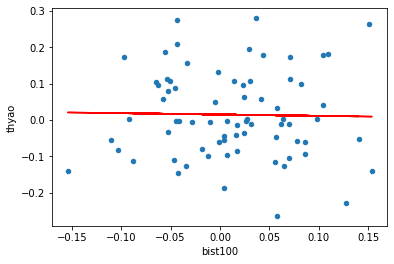

In [53]:
X_bist = X_bist.drop([-0.1972,-0.1019,-0.1455,-0.1742,0.012975])
Y_thyao = Y_thyao.drop([-0.1972,-0.1019,-0.1455,-0.1742,0.012975])
model_thyao2 = sm.OLS(Y_thyao, X_bist).fit()
beta, alpha = np.polyfit(x= returns_with_bist100["bist100"],y= returns_with_bist100["thyao"], deg=1)
print("beta and alpha for apple are", beta , alpha , "respectively")
#alpha is the excess return
returns_with_bist100.plot.scatter(x="bist100", y= "thyao")
plt.plot(returns_with_bist100["bist100"], beta * returns_with_bist100["bist100"] + alpha, "-", color="r")

/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


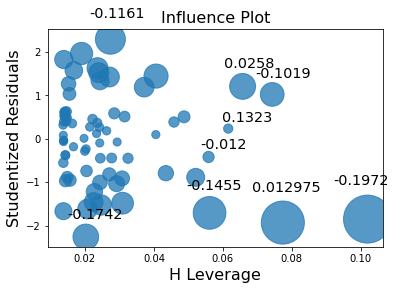

In [54]:
#sise
X_Bist100 = returns_with_bist100["bist100"]
X_bist = sm.add_constant(X_Bist100)
Y_sise = returns_with_bist100["sise"]
model_sise = sm.OLS(Y_sise, X_bist).fit()
sm.graphics.influence_plot(model_sise)
plt.show()

beta and alpha for apple are -0.07197069317425056 0.024864500942671213 respectively


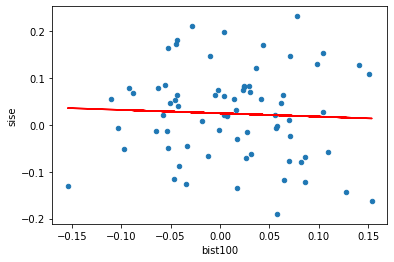

In [55]:
X_bist = X_bist.drop([-0.1972,-0.1019,-0.1455,-0.1742,0.012975,-0.1161,0.0258,0.1323,-0.012])
Y_sise = Y_sise.drop([-0.1972,-0.1019,-0.1455,-0.1742,0.012975,-0.1161,0.0258,0.1323,-0.012])
model_sise2 = sm.OLS(Y_sise, X_bist).fit()
beta, alpha = np.polyfit(x= returns_with_bist100["bist100"],y= returns_with_bist100["sise"], deg=1)
print("beta and alpha for apple are", beta , alpha , "respectively")
#alpha is the excess return
returns_with_bist100.plot.scatter(x="bist100", y= "sise")
plt.plot(returns_with_bist100["bist100"], beta * returns_with_bist100["bist100"] + alpha, "-", color="r")

/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


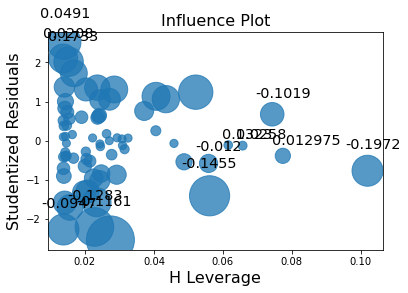

In [56]:
#tcell
X_Bist100 = returns_with_bist100["bist100"]
X_bist = sm.add_constant(X_Bist100)
Y_tcell = returns_with_bist100["tcell"]
model_tcell = sm.OLS(Y_tcell, X_bist).fit()
sm.graphics.influence_plot(model_tcell)
plt.show()

beta and alpha for apple are -0.15435065304393913 0.012402808150927508 respectively


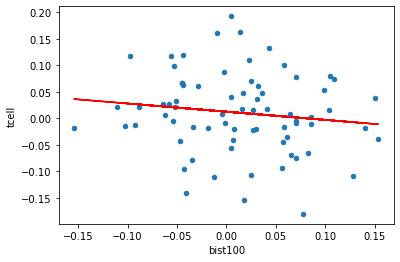

In [57]:
X_bist = X_bist.drop([-0.1972,-0.1019,-0.1455,0.012975,-0.1283,0.0491])
Y_tcell = Y_tcell.drop([-0.1972,-0.1019,-0.1455,0.012975,-0.1283,0.0491])
model_tcell2 = sm.OLS(Y_tcell, X_bist).fit()
beta, alpha = np.polyfit(x= returns_with_bist100["bist100"],y= returns_with_bist100["tcell"], deg=1)
print("beta and alpha for apple are", beta , alpha , "respectively")
#alpha is the excess return
returns_with_bist100.plot.scatter(x="bist100", y= "tcell")
plt.plot(returns_with_bist100["bist100"], beta * returns_with_bist100["bist100"] + alpha, "-", color="r")

/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


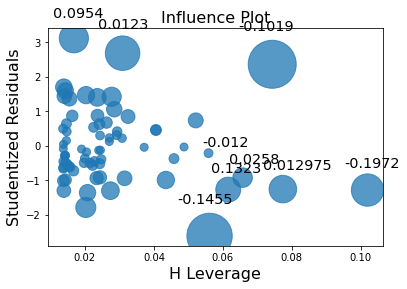

In [58]:
#tcell
X_Bist100 = returns_with_bist100["bist100"]
X_bist = sm.add_constant(X_Bist100)
Y_pgsus = returns_with_bist100["pgsus"]
model_pgsus = sm.OLS(Y_pgsus, X_bist).fit()
sm.graphics.influence_plot(model_pgsus)
plt.show()

beta and alpha for apple are 0.21475922334675804 0.031175534598866593 respectively


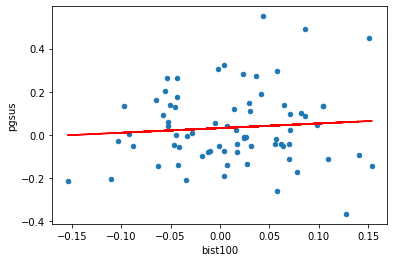

In [59]:
X_bist = X_bist.drop([-0.1972,-0.1019,-0.1455,0.012975,-0.012,0.0954,0.0123,0.1323])
Y_pgsus = Y_pgsus.drop([-0.1972,-0.1019,-0.1455,0.012975,-0.012,0.0954,0.0123,0.1323])
model_pgsus2 = sm.OLS(Y_pgsus, X_bist).fit()
beta, alpha = np.polyfit(x= returns_with_bist100["bist100"],y= returns_with_bist100["pgsus"], deg=1)
print("beta and alpha for apple are", beta , alpha , "respectively")
#alpha is the excess return
returns_with_bist100.plot.scatter(x="bist100", y= "pgsus")
plt.plot(returns_with_bist100["bist100"], beta * returns_with_bist100["bist100"] + alpha, "-", color="r")

/Users/Elma/Desktop/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


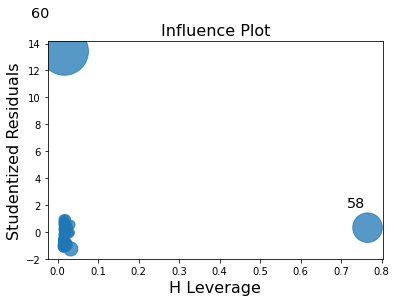

In [60]:
#tskb
expected_returns_with_bist100["bist100"] = expected_returns_with_bist100["BIST-100"]
X_Bist100 = expected_returns_with_bist100["bist100"]
X_bist = sm.add_constant(X_Bist100)
Y_tskb = expected_returns_with_bist100["tskb"]
model_tskb = sm.OLS(Y_tskb, X_bist).fit()
sm.graphics.influence_plot(model_tskb)
plt.show()

beta and alpha for apple are 0.0780631807974723 0.014251929040263484 respectively


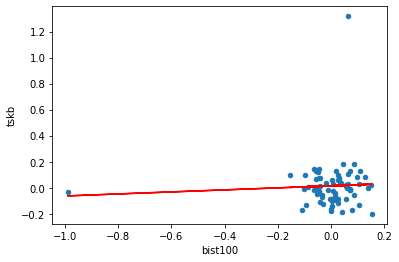

In [61]:
X_bist = X_bist.drop([60,58])
Y_tskb = Y_tskb.drop([60,58])
model_tskb2 = sm.OLS(Y_tskb, X_bist).fit()
beta, alpha = np.polyfit(x= expected_returns_with_bist100["bist100"],y= expected_returns_with_bist100["tskb"], deg=1)
print("beta and alpha for apple are", beta , alpha , "respectively")
#alpha is the excess return
expected_returns_with_bist100.plot.scatter(x="bist100", y= "tskb")
plt.plot(expected_returns_with_bist100["bist100"], beta * expected_returns_with_bist100["bist100"] + alpha, "-", color="r")

In [62]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

returns_with_bist100.corr()
slr_sm_model = smf.ols('aksa ~ bist100', data=returns_with_bist100)
### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_ko = slr_sm_model.fit()
### Summarize the model
print(slr_sm_model_ko.summary()) 

param_slr = slr_sm_model_ko.params

                            OLS Regression Results                            
Dep. Variable:                   aksa   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.06939
Date:                Fri, 24 Dec 2021   Prob (F-statistic):              0.793
Time:                        16:01:18   Log-Likelihood:                 64.472
No. Observations:                  73   AIC:                            -124.9
Df Residuals:                      71   BIC:                            -120.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0311      0.012      2.576      0.0

In [63]:
slr_sm_model = smf.ols('garanti ~ bist100', data=returns_with_bist100)
### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_ko = slr_sm_model.fit()
### Summarize the model
print(slr_sm_model_ko.summary()) 

param_slr = slr_sm_model_ko.params

                            OLS Regression Results                            
Dep. Variable:                garanti   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.745
Date:                Fri, 24 Dec 2021   Prob (F-statistic):              0.191
Time:                        16:01:18   Log-Likelihood:                 59.382
No. Observations:                  73   AIC:                            -114.8
Df Residuals:                      71   BIC:                            -110.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0141      0.013      1.087      0.2

In [64]:
slr_sm_model = smf.ols('skbnk ~ bist100', data=returns_with_bist100)
### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_ko = slr_sm_model.fit()
### Summarize the model
print(slr_sm_model_ko.summary()) 

param_slr = slr_sm_model_ko.params

                            OLS Regression Results                            
Dep. Variable:                  skbnk   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.4579
Date:                Fri, 24 Dec 2021   Prob (F-statistic):              0.501
Time:                        16:01:18   Log-Likelihood:                 58.837
No. Observations:                  73   AIC:                            -113.7
Df Residuals:                      71   BIC:                            -109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0051      0.013      0.387      0.7

In [65]:
slr_sm_model = smf.ols('kchol ~ bist100', data=returns_with_bist100)
### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_ko = slr_sm_model.fit()
### Summarize the model
print(slr_sm_model_ko.summary()) 

param_slr = slr_sm_model_ko.params

                            OLS Regression Results                            
Dep. Variable:                  kchol   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                   0.01430
Date:                Fri, 24 Dec 2021   Prob (F-statistic):              0.905
Time:                        16:01:18   Log-Likelihood:                 73.610
No. Observations:                  73   AIC:                            -143.2
Df Residuals:                      71   BIC:                            -138.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0150      0.011      1.404      0.1

In [66]:
slr_sm_model = smf.ols('sise ~ bist100', data=returns_with_bist100)
### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_ko = slr_sm_model.fit()
### Summarize the model
print(slr_sm_model_ko.summary()) 

param_slr = slr_sm_model_ko.params

                            OLS Regression Results                            
Dep. Variable:                   sise   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.1737
Date:                Fri, 24 Dec 2021   Prob (F-statistic):              0.678
Time:                        16:01:18   Log-Likelihood:                 67.852
No. Observations:                  73   AIC:                            -131.7
Df Residuals:                      71   BIC:                            -127.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0249      0.012      2.156      0.0

In [67]:
slr_sm_model = smf.ols('tcell ~ bist100', data=returns_with_bist100)
### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_ko = slr_sm_model.fit()
### Summarize the model
print(slr_sm_model_ko.summary()) 

param_slr = slr_sm_model_ko.params

                            OLS Regression Results                            
Dep. Variable:                  tcell   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.333
Date:                Fri, 24 Dec 2021   Prob (F-statistic):              0.252
Time:                        16:01:18   Log-Likelihood:                 86.527
No. Observations:                  73   AIC:                            -169.1
Df Residuals:                      71   BIC:                            -164.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0124      0.009      1.389      0.1

In [68]:
slr_sm_model = smf.ols('thyao ~ bist100', data=returns_with_bist100)
### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_ko = slr_sm_model.fit()
### Summarize the model
print(slr_sm_model_ko.summary()) 

param_slr = slr_sm_model_ko.params

                            OLS Regression Results                            
Dep. Variable:                  thyao   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                   0.02961
Date:                Fri, 24 Dec 2021   Prob (F-statistic):              0.864
Time:                        16:01:19   Log-Likelihood:                 51.952
No. Observations:                  73   AIC:                            -99.90
Df Residuals:                      71   BIC:                            -95.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0150      0.014      1.043      0.3

In [69]:
slr_sm_model = smf.ols('ttkom ~ bist100', data=returns_with_bist100)
### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_ko = slr_sm_model.fit()
### Summarize the model
print(slr_sm_model_ko.summary()) 

param_slr = slr_sm_model_ko.params

                            OLS Regression Results                            
Dep. Variable:                  ttkom   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     77.23
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           5.79e-13
Time:                        16:01:19   Log-Likelihood:                 94.383
No. Observations:                  73   AIC:                            -184.8
Df Residuals:                      71   BIC:                            -180.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0044      0.008     -0.554      0.5

In [70]:
slr_sm_model = smf.ols('pgsus ~ bist100', data=returns_with_bist100)
### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_ko = slr_sm_model.fit()
### Summarize the model
print(slr_sm_model_ko.summary()) 

param_slr = slr_sm_model_ko.params

                            OLS Regression Results                            
Dep. Variable:                  pgsus   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4774
Date:                Fri, 24 Dec 2021   Prob (F-statistic):              0.492
Time:                        16:01:19   Log-Likelihood:                 24.944
No. Observations:                  73   AIC:                            -45.89
Df Residuals:                      71   BIC:                            -41.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0312      0.021      1.501      0.1

In [71]:

expected_returns_with_bist100["bist100"] = expected_returns_with_bist100["BIST-100"]
slr_sm_model = smf.ols('tskb ~ bist100', data=expected_returns_with_bist100)
### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_ko = slr_sm_model.fit()
### Summarize the model
print(slr_sm_model_ko.summary()) 

param_slr = slr_sm_model_ko.params

                            OLS Regression Results                            
Dep. Variable:                   tskb   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.2359
Date:                Fri, 24 Dec 2021   Prob (F-statistic):              0.629
Time:                        16:01:19   Log-Likelihood:                 21.319
No. Observations:                  73   AIC:                            -38.64
Df Residuals:                      71   BIC:                            -34.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0143      0.021      0.665      0.5

In [72]:
#calculate the skewness and kurtosis of stocks
from scipy.stats import kurtosis, skew
for i in expected_returns_with_bist100.columns[:10]:
    print("the skewness of stock", i, "is", skew(expected_returns_with_bist100[i], bias=False))
    print("the kurtosis of stock", i, "is", kurtosis(expected_returns_with_bist100[i], bias=False))

the skewness of stock aksa is -2.0136015244578513
the kurtosis of stock aksa is 11.525207459211105
the skewness of stock garanti is 0.20113111057016644
the kurtosis of stock garanti is 0.2680931924265937
the skewness of stock kchol is -0.47084943678544844
the kurtosis of stock kchol is 1.7447340335663801
the skewness of stock sise is -1.0563132341436445
the kurtosis of stock sise is 3.2056011271182285
the skewness of stock skbnk is 0.6149953986408976
the kurtosis of stock skbnk is 1.5812942859493244
the skewness of stock tcell is -0.1895766164380873
the kurtosis of stock tcell is 1.3000237652074969
the skewness of stock thyao is 0.1342655437675261
the kurtosis of stock thyao is -0.36449144028206426
the skewness of stock tskb is 5.127602660198233
the kurtosis of stock tskb is 36.66727465843978
the skewness of stock ttkom is 0.05793279723111391
the kurtosis of stock ttkom is 0.6929675131972286
the skewness of stock PGSUS is 0.2619548860273151
the kurtosis of stock PGSUS is 1.090738732319

In [73]:
var_calc_df = expected_returns_with_bist100.drop(labels = "BIST-100", axis= 1)
var_calc_df

,aksa,garanti,kchol,sise,skbnk,tcell,thyao,tskb,ttkom,PGSUS,bist100
1,-0.011342,-0.027322,-0.091667,0.081356,0.000000,-0.043103,-0.110337,-0.019481,-0.046105,-0.046524,0.070123
2,-0.018164,0.043539,-0.088407,-0.062696,0.083871,-0.108108,-0.035248,0.006623,-0.090000,-0.015143,-0.052591
3,-0.061344,-0.009421,0.081427,0.130435,-0.089286,0.062626,-0.010825,-0.032895,-0.010989,-0.052961,-0.046599
4,0.082987,0.119565,0.094755,0.082840,-0.013072,0.053232,0.001368,0.095238,0.068518,0.045099,0.024455
5,-0.066092,0.046116,0.105873,0.068306,0.059603,0.069495,0.064208,0.024845,0.157712,-0.010932,0.031754
6,-0.058163,-0.108731,0.022362,-0.099744,-0.006250,0.021097,-0.114249,0.080127,0.011976,-0.051193,0.098314
7,-0.089941,0.002645,-0.085080,0.046454,-0.138365,-0.110744,-0.098551,-0.114285,-0.107988,-0.077866,0.024737
8,0.013004,-0.032982,0.000763,0.021201,-0.043796,-0.017658,-0.080386,0.005161,0.044104,-0.097739,-0.088182
9,0.089859,0.040928,-0.024390,0.017857,-0.068702,-0.002496,-0.096154,-0.015038,-0.001653,-0.142225,-0.012675
10,-0.038869,0.041940,0.003125,-0.070175,-0.049180,-0.041506,-0.001934,0.038168,-0.011589,0.040378,-0.018377


In [74]:
#VaR for stocks
for j in var_calc_df.columns:
    liste = list(var_calc_df[j].sort_values(ascending=True)[:4])
    print("VaR for the stock", j, "is", liste[3])

VaR for the stock aksa is -0.10447760158598063
VaR for the stock garanti is -0.1612020651193834
VaR for the stock kchol is -0.14354055033108704
VaR for the stock sise is -0.15758467510847807
VaR for the stock skbnk is -0.1711711711711712
VaR for the stock tcell is -0.12670988912377945
VaR for the stock thyao is -0.18930283589560304
VaR for the stock tskb is -0.17441882513557594
VaR for the stock ttkom is -0.1719009662233184
VaR for the stock PGSUS is -0.20975883342680868
VaR for the stock bist100 is -0.10280020773463228


In [75]:
#expected shortfall for each stock
for i in var_calc_df.columns:
    print("Expected Shortfall at 5% for stock", i, "is", var_calc_df[i].sort_values(ascending=True)[:4].mean())

Expected Shortfall at 5% for stock aksa is -0.30613364199013127
Expected Shortfall at 5% for stock garanti is -0.1965948346101748
Expected Shortfall at 5% for stock kchol is -0.22367048972173953
Expected Shortfall at 5% for stock sise is -0.24740759017181108
Expected Shortfall at 5% for stock skbnk is -0.21573227878714812
Expected Shortfall at 5% for stock tcell is -0.18589244375572198
Expected Shortfall at 5% for stock thyao is -0.2337009115962753
Expected Shortfall at 5% for stock tskb is -0.1866091256564646
Expected Shortfall at 5% for stock ttkom is -0.2187525217882264
Expected Shortfall at 5% for stock PGSUS is -0.3429568110898543
Expected Shortfall at 5% for stock bist100 is -0.3394319442594427


PART IV

In [76]:
#first sub-period returns
Bist100_returns = expected_returns_with_bist100["BIST-100"]
first_sub_Bist100_returns = Bist100_returns[:35]
first_sub_betas = []
for i in first_sub_period_returns.columns:
    beta, alpha = np.polyfit(x= first_sub_Bist100_returns,y= first_sub_period_returns[i], deg=1)
    first_sub_betas.append(beta)
    print("Beta and alpha for", i, "are", beta , alpha , "respectively")

Beta and alpha for aksa are 0.1447160735283193 0.0053031087032902186 respectively
Beta and alpha for garanti are 0.12782596240702634 0.004516863845354769 respectively
Beta and alpha for kchol are -0.175860408346211 0.013309767913059028 respectively
Beta and alpha for sise are -0.08199462426096848 0.025728246077875005 respectively
Beta and alpha for skbnk are -0.12450833759542528 -0.00402601129941524 respectively
Beta and alpha for tcell are 0.1889527462050584 0.006941898981469683 respectively
Beta and alpha for thyao are -0.03852422184513045 0.03004299605256417 respectively
Beta and alpha for tskb are 0.3207234453990779 -0.0007232664195427142 respectively
Beta and alpha for ttkom are 0.17673900521236383 -0.012296973287381423 respectively
Beta and alpha for PGSUS are -0.08603992256845068 0.01847001007243262 respectively


In [77]:
#second sub-period returns
Bist100_returns = expected_returns_with_bist100["BIST-100"]
second_sub_Bist100_returns = Bist100_returns[35:]

for i in first_sub_period_returns.columns:
    beta, alpha = np.polyfit(x= second_sub_Bist100_returns,y= second_sub_period_returns[i], deg=1)
    print("Beta and alpha for", i, "are", beta , alpha , "respectively")

Beta and alpha for aksa are -0.0251812485026747 0.03499065854554606 respectively
Beta and alpha for garanti are -0.024405009698464934 0.012539569854582263 respectively
Beta and alpha for kchol are 0.05290662725841586 0.006989086644784229 respectively
Beta and alpha for sise are -0.17090387545754443 0.009768358103900213 respectively
Beta and alpha for skbnk are 0.01012970120520197 0.012048072419595088 respectively
Beta and alpha for tcell are -0.0035863665834963455 0.008712423787157931 respectively
Beta and alpha for thyao are -0.07651576872256567 -0.006558743861049789 respectively
Beta and alpha for tskb are 0.06549702696976961 0.02616348208853771 respectively
Beta and alpha for ttkom are 0.006329086661250119 0.02094874263598641 respectively
Beta and alpha for PGSUS are -0.020373911678150263 0.035026547132382325 respectively


Stocks with negative betas indicate that these stocks moves in the opposite direction with the stock market. In other words, when the stock market(BIST-100) declines, the stocks with negative beta increases.

When these two sub-periods are examined, it can be deduced that some of the stocks mentioned above change their movements based on the market. For instance, Aksa and Garanti stocks have a positive beta in the first sub-period, however; they have negative beta values in the second sub-period. This means that during the first period, these stocks moved in the same direction with the market,whereas during the second sub-period, they moved in the opposite direction with the market. In addition, there are some stocks which have positive betas during both in first and second sub-periods, namely TTKOM, TSKB. 

In order to understand whether stocks are overpriced or underpriced, we can calculate CAPM with respected beta values.

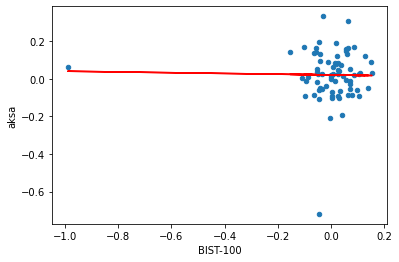

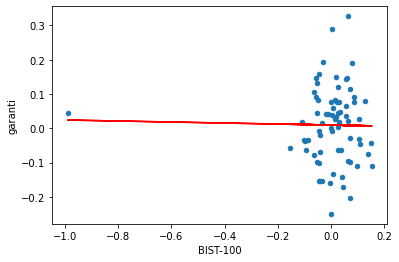

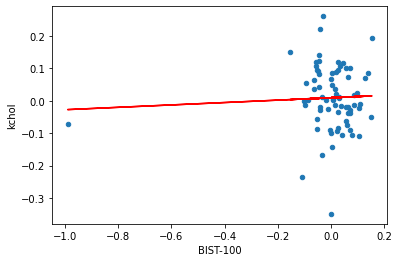

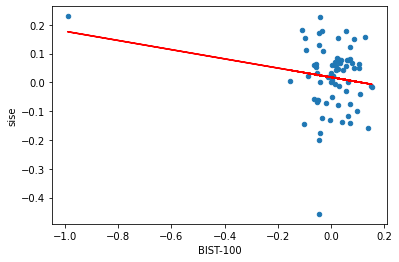

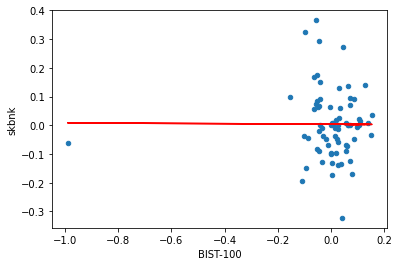

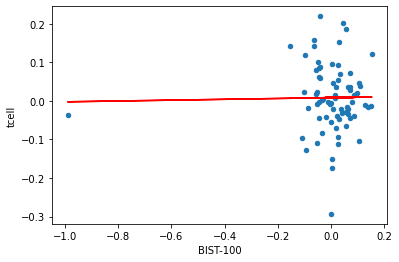

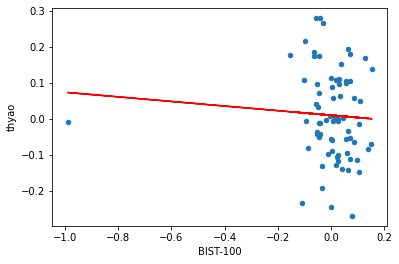

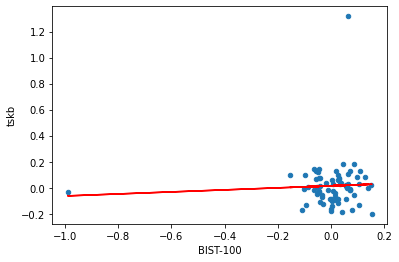

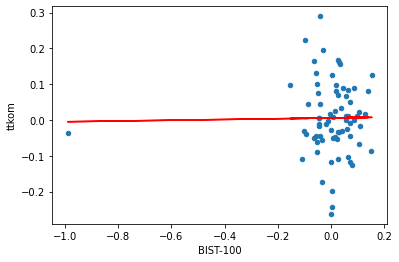

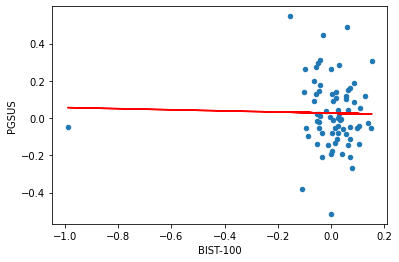

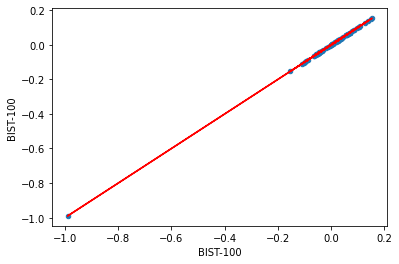

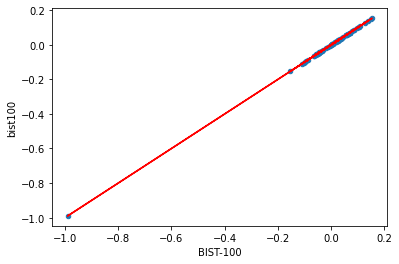

In [78]:

beta = {}
alpha = {}

for i in expected_returns_with_bist100.columns:
    expected_returns_with_bist100.plot(kind = "scatter", x = "BIST-100", y = i)
    b, a = np.polyfit(expected_returns_with_bist100["BIST-100"], expected_returns_with_bist100[i], 1)
    plt.plot(expected_returns_with_bist100["BIST-100"], b * expected_returns_with_bist100["BIST-100"] + a, "-", color = "r")
    beta[i] = b
    alpha[i] = a
    plt.show()


In [79]:
#calculate capm for each stock
ER = {}
rf = 0.21
rm = expected_returns_with_bist100["BIST-100"].mean()
for i in list(beta.keys()):
    ER[i] = rf + (beta[i] * (rm - rf))
ER

{'aksa': 0.21424098029370295,
 'garanti': 0.2131311618523545,
 'kchol': 0.20217738438370153,
 'sise': 0.24389255642052066,
 'skbnk': 0.21098312078566167,
 'tcell': 0.20769340583192983,
 'thyao': 0.2235236857140894,
 'tskb': 0.19343483641086223,
 'ttkom': 0.20774895778486485,
 'PGSUS': 0.21634849356835165,
 'BIST-100': -0.0022020063737160644,
 'bist100': -0.0022020063737160644}

In [80]:
expected_returns_with_bist100.mean()

aksa        0.021446
garanti     0.009314
kchol       0.009050
sise        0.018128
skbnk       0.003817
tcell       0.008589
thyao       0.011300
tskb        0.014080
ttkom       0.005631
PGSUS       0.026888
BIST-100   -0.002202
bist100    -0.002202
dtype: float64

In [83]:
stock_dic = {}
expected_returns_with_bist100 = expected_returns_with_bist100.drop("BIST-100",axis =1)
for i in range(10):
    for j in expected_returns_with_bist100.columns:
        stock_dic[j] = np.array(expected_returns_with_bist100.iloc[[i]])
stock_dic

{'aksa': array([[-0.03886895,  0.04193963,  0.00312492, -0.07017521, -0.04918033,
         -0.04150579, -0.00193424,  0.03816814, -0.01158946,  0.04037801,
         -0.01837743]]),
 'garanti': array([[-0.03886895,  0.04193963,  0.00312492, -0.07017521, -0.04918033,
         -0.04150579, -0.00193424,  0.03816814, -0.01158946,  0.04037801,
         -0.01837743]]),
 'kchol': array([[-0.03886895,  0.04193963,  0.00312492, -0.07017521, -0.04918033,
         -0.04150579, -0.00193424,  0.03816814, -0.01158946,  0.04037801,
         -0.01837743]]),
 'sise': array([[-0.03886895,  0.04193963,  0.00312492, -0.07017521, -0.04918033,
         -0.04150579, -0.00193424,  0.03816814, -0.01158946,  0.04037801,
         -0.01837743]]),
 'skbnk': array([[-0.03886895,  0.04193963,  0.00312492, -0.07017521, -0.04918033,
         -0.04150579, -0.00193424,  0.03816814, -0.01158946,  0.04037801,
         -0.01837743]]),
 'tcell': array([[-0.03886895,  0.04193963,  0.00312492, -0.07017521, -0.04918033,
       

In [5]:
import time
import datetime
import pandas as pd

ticker = "AKSA.IS"
period1 = int(time.mktime(datetime.datetime(2021,11,29,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021,12,24,23,59).timetuple()))
interval = '1d'
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df_aksa = pd.read_csv(query_string)
print(df_aksa)

          Date       Open       High        Low      Close  Adj Close   Volume
0   2021-11-29  26.059999  27.900000  26.059999  27.900000  27.900000  2243054
1   2021-11-30  27.900000  29.280001  27.719999  27.719999  27.719999  2513730
2   2021-12-01  28.139999  29.500000  28.139999  29.160000  29.160000  2049123
3   2021-12-02  29.240000  30.879999  29.240000  29.700001  29.700001  1985087
4   2021-12-03  29.820000  30.440001  29.700001  29.900000  29.900000  1658372
5   2021-12-06  30.059999  30.180000  28.900000  29.760000  29.760000  1551527
6   2021-12-07  29.820000  30.139999  29.520000  30.059999  30.059999  2052694
7   2021-12-08  30.200001  30.320000  29.000000  29.980000  29.980000  1608580
8   2021-12-09  30.139999  31.040001  30.139999  30.420000  30.420000  2004600
9   2021-12-10  30.440001  32.200001  30.139999  31.860001  31.860001  2148975
10  2021-12-13  32.400002  35.040001  32.400002  35.040001  35.040001  2571893
11  2021-12-14  36.720001  38.540001  35.799999  36.

In [7]:
data = dict()

In [8]:
data["aksa"] = df_aksa["Adj Close"]

In [11]:
query_string_thyao = f'https://query1.finance.yahoo.com/v7/finance/download/THYAO.IS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

query_string_pgsus = f'https://query1.finance.yahoo.com/v7/finance/download/PGSUS.IS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
query_string_sise = f'https://query1.finance.yahoo.com/v7/finance/download/SISE.IS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
query_string_kchol = f'https://query1.finance.yahoo.com/v7/finance/download/KCHOL.IS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
#query_string_tskb = f'https://query1.finance.yahoo.com/v7/finance/download/TSKB.IS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
#query_string_skbnk = f'https://query1.finance.yahoo.com/v7/finance/download/SKBNK.IS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
#query_string_garanti = f'https://query1.finance.yahoo.com/v7/finance/download/GARAN.IS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
query_string_tcell = f'https://query1.finance.yahoo.com/v7/finance/download/TCELL.IS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
#query_string_ttkom = f'https://query1.finance.yahoo.com/v7/finance/download/TTKOM.IS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
query_string_bist100 = f'https://query1.finance.yahoo.com/v7/finance/download/XU100.IS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df_thyao = pd.read_csv(query_string_thyao)
df_pgsus = pd.read_csv(query_string_pgsus)
df_sise = pd.read_csv(query_string_sise)
df_kchol = pd.read_csv(query_string_kchol)
df_tcell = pd.read_csv(query_string_tcell)

df_tskb = pd.read_csv(query_string_tskb)
df_skbnk = pd.read_csv(query_string_skbnk)
df_garanti = pd.read_csv(query_string_garanti)
df_tcell = pd.read_csv(query_string_tcell)
df_ttkom = pd.read_csv(query_string_ttkom)
df_bist100 = pd.read_csv(query_string_bist100)

data["thyao"] = df_thyao["Adj Close"]

data["pgsus"] = df_pgsus["Adj Close"]
data["sise"] = df_sise["Adj Close"]
data["kchol"] = df_kchol["Adj Close"]
data["tskb"] = df_tskb["Adj Close"]
data["skbnk"] = df_skbnk["Adj Close"]
data["garanti"] = df_garanti["Adj Close"]
data["tcell"] = df_tcell["Adj Close"]
data["ttkom"] = df_ttkom["Adj Close"]
data["bist100"] = df_bist100["Adj Close"]

data

{'aksa': 0     27.900000
 1     27.719999
 2     29.160000
 3     29.700001
 4     29.900000
 5     29.760000
 6     30.059999
 7     29.980000
 8     30.420000
 9     31.860001
 10    35.040001
 11    36.180000
 12    36.639999
 13    37.779999
 14    34.820000
 15    37.720001
 16    33.959999
 17    32.220001
 18    31.280001
 19    32.840000
 Name: Adj Close, dtype: float64, 'thyao': 0     17.320000
 1     17.219999
 2     18.410000
 3     18.250000
 4     18.530001
 5     18.690001
 6     19.200001
 7     20.379999
 8     22.000000
 9     22.240000
 10    22.639999
 11    22.580000
 12    23.480000
 13    25.120001
 14    22.620001
 15    22.139999
 16    19.930000
 17    18.879999
 18    19.209999
 19    21.120001
 Name: Adj Close, dtype: float64, 'pgsus': 0      89.849998
 1      88.000000
 2      92.550003
 3      91.050003
 4      92.949997
 5      94.449997
 6      96.550003
 7     100.199997
 8     104.900002
 9     104.699997
 10    103.900002
 11    102.500000
 12    104.4

In [14]:
df = pd.concat(data, axis=1)
df = df[["aksa","kchol","sise","tcell","thyao","pgsus","bist100"]]
df

,aksa,garanti,kchol,sise,skbnk,tcell,thyao,tskb,ttkom,pgsus,bist100
0,27.900000,11.40,29.020000,12.290000,1.12,18.480000,17.320000,1.47,9.60,89.849998,1808.800049
1,27.719999,11.42,28.540001,12.550000,1.13,18.900000,17.219999,1.48,9.83,88.000000,1809.699951
2,29.160000,11.64,29.299999,12.970000,1.16,19.500000,18.410000,1.49,9.94,92.550003,1857.400024
3,29.700001,11.65,30.080000,13.320000,1.19,19.740000,18.250000,1.50,10.21,91.050003,1880.099976
4,29.900000,11.66,31.440001,13.250000,1.21,20.299999,18.530001,1.59,10.60,92.949997,1910.400024
5,29.760000,11.84,31.240000,13.340000,1.23,20.360001,18.690001,1.63,10.33,94.449997,1927.400024
6,30.059999,11.83,32.459999,14.670000,1.22,20.580000,19.200001,1.62,10.66,96.550003,1981.000000
7,29.980000,11.98,33.400002,14.890000,1.22,20.600000,20.379999,1.64,10.77,100.199997,2004.599976
8,30.420000,11.86,33.439999,15.400000,1.23,20.280001,22.000000,1.63,10.81,104.900002,2031.400024
9,31.860001,11.73,33.180000,15.790000,1.20,20.000000,22.240000,1.58,10.70,104.699997,2035.500000


In [67]:
z_df = df.copy()
z_df = z_df.drop("bist100",axis=1)
a = list(z_df.loc[4])
b = list(z_df.loc[9])
c = list(z_df.loc[14])
d = list(z_df.loc[19])
weightss = np.array([0.259881456847794,0.0360947908501864,-0.063188108598428,0.303402665065043,-0.16391270169274,0.256773453939189,0.0408464863535409,0.0406170312044951,0.284853979905693,0.00463094612522694])
first_week_arr = np.array(a)
sec_week_arr = np.array(b)
third_week_arr = np.array(c)
fourth_week_arr = np.array(d)

first = np.multiply(first_week_arr,weightss).sum()
sec = np.multiply(sec_week_arr,weightss).sum()
third = np.multiply(third_week_arr,weightss).sum()
four = np.multiply(fourth_week_arr,weightss).sum()

print(first,sec, third, four)
liste = [first,sec,third,four]

summ = 0
for i in liste:
    summ += i
    avr = summ / 4

liste_arr = np.array(liste)
print("mean: ",avr, "std: ",liste_arr.std())

19.510303552835317 20.84153424277373 21.627187064167185 20.41171891681755
mean:  20.597685944148445 std:  0.7642510629783956


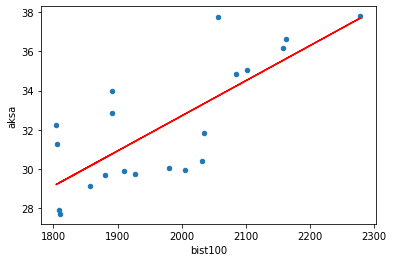

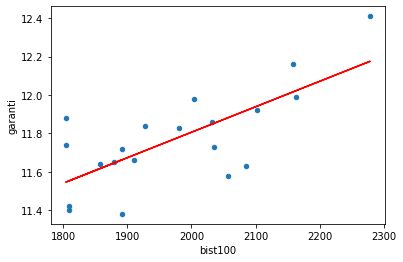

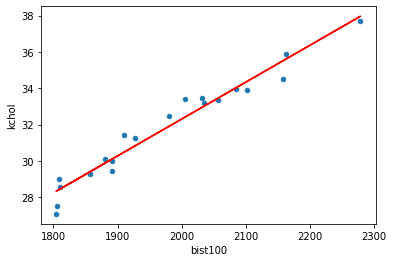

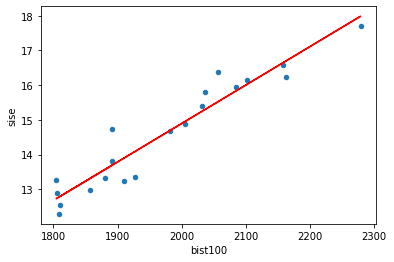

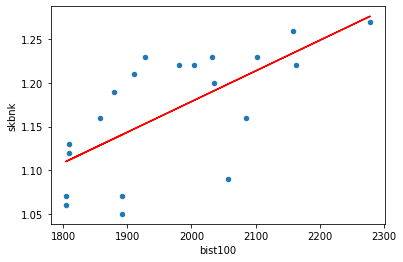

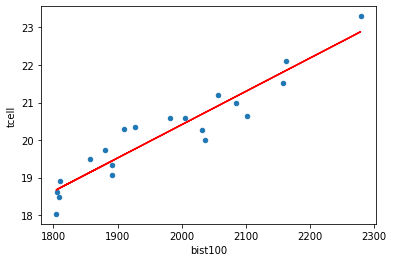

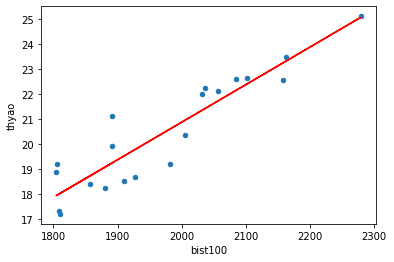

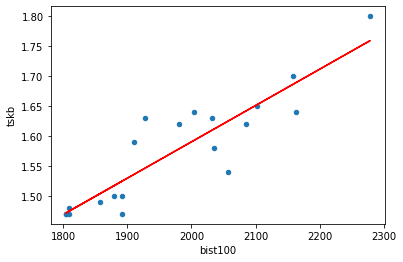

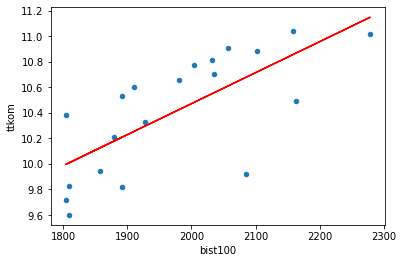

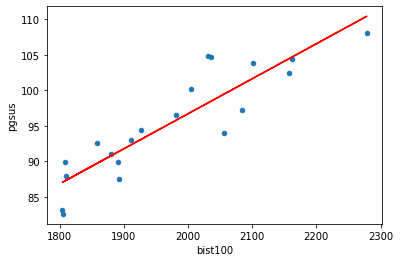

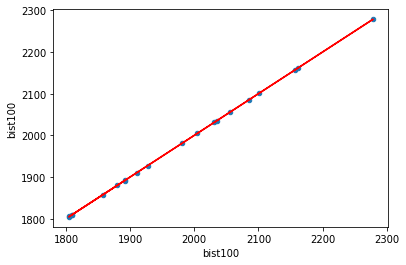

In [22]:
import numpy as np
import matplotlib.pyplot as plt
beta_new = {}
alpha_new = {}

for i in df.columns:
    df.plot(kind = "scatter", x = "bist100", y = i)
    b, a = np.polyfit(df["bist100"], df[i], 1)
    plt.plot(df["bist100"], b * df["bist100"] + a, "-", color = "r")
    beta_new[i] = b
    alpha_new[i] = a
    plt.show()

In [29]:
#caluclate daily return 
expected_return_port = df.pct_change()
expected_return_port = expected_return_port.drop([0])
expected_return_port

,aksa,garanti,kchol,sise,skbnk,tcell,thyao,tskb,ttkom,pgsus,bist100
1,-0.006452,0.001754,-0.016540,0.021155,0.008929,0.022727,-0.005774,0.006803,0.023958,-0.020590,0.000498
2,0.051948,0.019264,0.026629,0.033466,0.026549,0.031746,0.069106,0.006757,0.011190,0.051705,0.026358
3,0.018519,0.000859,0.026621,0.026985,0.025862,0.012308,-0.008691,0.006711,0.027163,-0.016207,0.012221
4,0.006734,0.000858,0.045213,-0.005255,0.016807,0.028369,0.015343,0.060000,0.038198,0.020868,0.016116
5,-0.004682,0.015437,-0.006361,0.006792,0.016529,0.002956,0.008635,0.025157,-0.025472,0.016138,0.008899
6,0.010081,-0.000845,0.039052,0.099700,-0.008130,0.010805,0.027287,-0.006135,0.031946,0.022234,0.027809
7,-0.002661,0.012680,0.028959,0.014997,0.000000,0.000972,0.061458,0.012346,0.010319,0.037804,0.011913
8,0.014676,-0.010017,0.001198,0.034251,0.008197,-0.015534,0.079490,-0.006098,0.003714,0.046906,0.013369
9,0.047337,-0.010961,-0.007775,0.025325,-0.024390,-0.013807,0.010909,-0.030675,-0.010176,-0.001907,0.002018
10,0.099812,0.016198,0.021097,0.022166,0.025000,0.032000,0.017986,0.044304,0.016822,-0.007641,0.032424


In [68]:
##as the average portfolio returns are mentioned above
##there is no dividend paid during the period, therefore, we can simply calculate cumulative
#rate of return

In [54]:
#cummulative return 
cum_list = list()
for i in expected_return_port.columns:
    cum_list.append((expected_return_port[i][19] / expected_return_port[i][1]) -1)

cum_list.pop()
cum_array = np.array(cum_list)
cum_array

array([ -8.73013088,  -1.97103918,  -5.17106276,   2.33708301,
         0.05660377,   0.67776339, -18.22066921,   2.        ,
        -0.39683338,  -5.29229808])

In [56]:
#weights of the portfolio
portfolio_weights = np.array([0.259881456847794,0.0360947908501864,-0.063188108598428,0.303402665065043,-0.16391270169274,0.256773453939189,0.0408464863535409,0.0406170312044951,0.284853979905693,0.00463094612522694])
portfolio_weights

#multiply weights with cumulative returns
result = np.multiply(cum_array,portfolio_weights)
result.sum()

-1.9399270878927535

In [69]:
#value of the portfolio at the end of the first week
first_list = list()
for i in expected_return_port.columns:
    first_list.append((expected_return_port[i][4] / expected_return_port[i][1]) -1)
first_list.pop()
first_arr = np.array(first_list)
value_week1 = np.multiply(first_arr, portfolio_weights)
value_week1.sum()

-0.44510571848320657

In [33]:
#std
from scipy import stats
std = expected_return_port.std()*np.sqrt(252)
std

aksa       0.793835
garanti    0.362193
kchol      0.802035
sise       0.914250
skbnk      0.523932
tcell      0.696821
thyao      0.865756
tskb       0.690241
ttkom      0.788874
pgsus      0.710136
bist100    0.591888
dtype: float64

In [37]:
#treynor ratio
_aksa = stats.linregress(expected_return_port.aksa, expected_return_port.bist100)
_aksa

LinregressResult(slope=0.5709180337761429, intercept=-0.0025734383587247478, rvalue=0.7657096254927779, pvalue=0.00013274824027994893, stderr=0.11631134016068087, intercept_stderr=0.005775077654574075)

In [38]:
aksa_beta = _aksa[0]
aksa_beta

0.5709180337761429

In [ ]:
rf = 0.207

def treynor_ratio(er, returns, market, rf):
    return (er - rf) / beta(returns, market)
 
def sharpe_ratio(er, returns, rf):
    return (er - rf) / vol(returns)
 
def information_ratio(returns, benchmark):
    diff = returns - benchmark
    return np.mean(diff) / vol(diff)
 
def modigliani_ratio(er, returns, benchmark, rf):
    np_rf = np.empty(len(returns))
    np_rf.fill(rf)
    rdiff = returns - np_rf
    bdiff = benchmark - np_rf
    return (er - rf) * (vol(rdiff) / vol(bdiff)) + rf